# import libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_world_development_org = pd.read_excel("World_development_mesurement.xlsx",sheet_name="world_development");

In [3]:
data_world_development_org

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [4]:
data_world_development = data_world_development_org.copy()
data_world_development.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


# data cleaning and preparation

In [5]:
data_world_development.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

total no of rows = 2704 and total no of columns = 25
dataframe contains float, object and integer type of data.

# Encoding

In [6]:
#check unique values for country column
data_world_development['Country'].nunique()

208

In [7]:
#label encoding

In [8]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Country" column in the DataFrame
data_world_development['Country_encoded'] = le.fit_transform(data_world_development['Country'])

In [9]:
data_world_development['Country_encoded']=data_world_development['Country_encoded'].astype(float)


In [10]:
data_world_development.drop(['Country'],axis=1,inplace=True)

In [11]:
data_world_development.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",5.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",20.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",25.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",29.0


In [12]:
data_world_development.shape

(2704, 25)

In [13]:
#cleaning data like removing special characters or symbols like % , $

In [14]:
def check_for_special_characters(col):
    return any(isinstance(value, str) and ('%' in value or '$' in value) for value in col)

In [15]:
columns_with_special_chars = [col for col in data_world_development.columns if check_for_special_characters(data_world_development[col])]

In [16]:
columns_with_special_chars

['Business Tax Rate',
 'GDP',
 'Health Exp/Capita',
 'Tourism Inbound',
 'Tourism Outbound']

In [17]:
for i in columns_with_special_chars:
    if i == "GDP" or i=="Tourism Inbound" or i=="Tourism Outbound":
        data_world_development[i]=data_world_development[i].astype(str).str.replace('$','',regex=True).str.replace(',','')
        data_world_development[i]=pd.to_numeric(data_world_development[i],errors='coerce')
    elif i=="Health Exp/Capita":
        data_world_development[i]=data_world_development[i].astype(str).str.replace('$','',regex=True)
        data_world_development[i]=pd.to_numeric(data_world_development[i], errors='coerce')
    elif i == "Business Tax Rate":
        data_world_development[i]=data_world_development[i].astype(str).str.replace('%','',regex=True)
        data_world_development[i] = pd.to_numeric(data_world_development[i], errors='coerce')


In [18]:
data_world_development.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       1932 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [19]:
#check int datatype columns
integer_columns = data_world_development.select_dtypes(include=['int']).columns
integer_columns

Index(['Number of Records', 'Population Total'], dtype='object')

In [20]:
for i in integer_columns:
    data_world_development[i] = data_world_development[i].astype(float)


In [21]:
data_world_development.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       1932 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

All the column has same datatype now.

In [22]:
#check distribution
data_world_development.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,1932.000000,1416.000000,...,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03,2704.00000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,214.627847,302.068503,...,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09,103.50000
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,233.750350,273.299686,...,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10,60.05484
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05,0.00000
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,37.000000,156.000000,...,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08,51.75000
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,115.500000,239.000000,...,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08,103.50000
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,318.250000,344.750000,...,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09,155.25000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,998.000000,2600.000000,...,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11,207.00000


In [23]:
#"Number of Records" have 0 standard deviation which means same values is present in each record.
#There are outliers present in a few features like 'Days to Start Business', 'Hours to do Tax' as their max value is much higher compared to the 75th percentile value.

In [24]:
## Drop "Number of Records" column
data_world_development = data_world_development.drop(['Number of Records'],axis=1)

In [25]:
data_world_development.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [26]:
## Rename columns
data_world_development = data_world_development.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
data_world_development.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound',
       'Country_encoded'],
      dtype='object')

In [27]:
## Check missing values
data_world_development.isnull().sum().sum()

12203

In [28]:
## Check null values in dataset
data_world_development.isnull().sum()

BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          772
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound           368
TourismOutbound          471
Country_encoded            0
dtype: int64

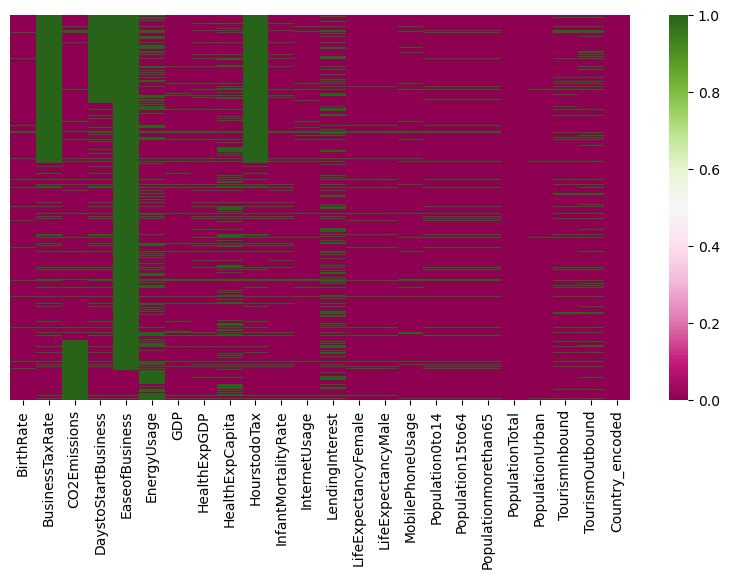

In [29]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(data_world_development.isnull(),cmap='PiYG',yticklabels=False,cbar=True)
plt.show()

In [30]:
#from the above visualization we can conclude that EaseOfBusiness has large no of missing values.Population total not contains missing values and PopulationUrban has less missing values.

In [31]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


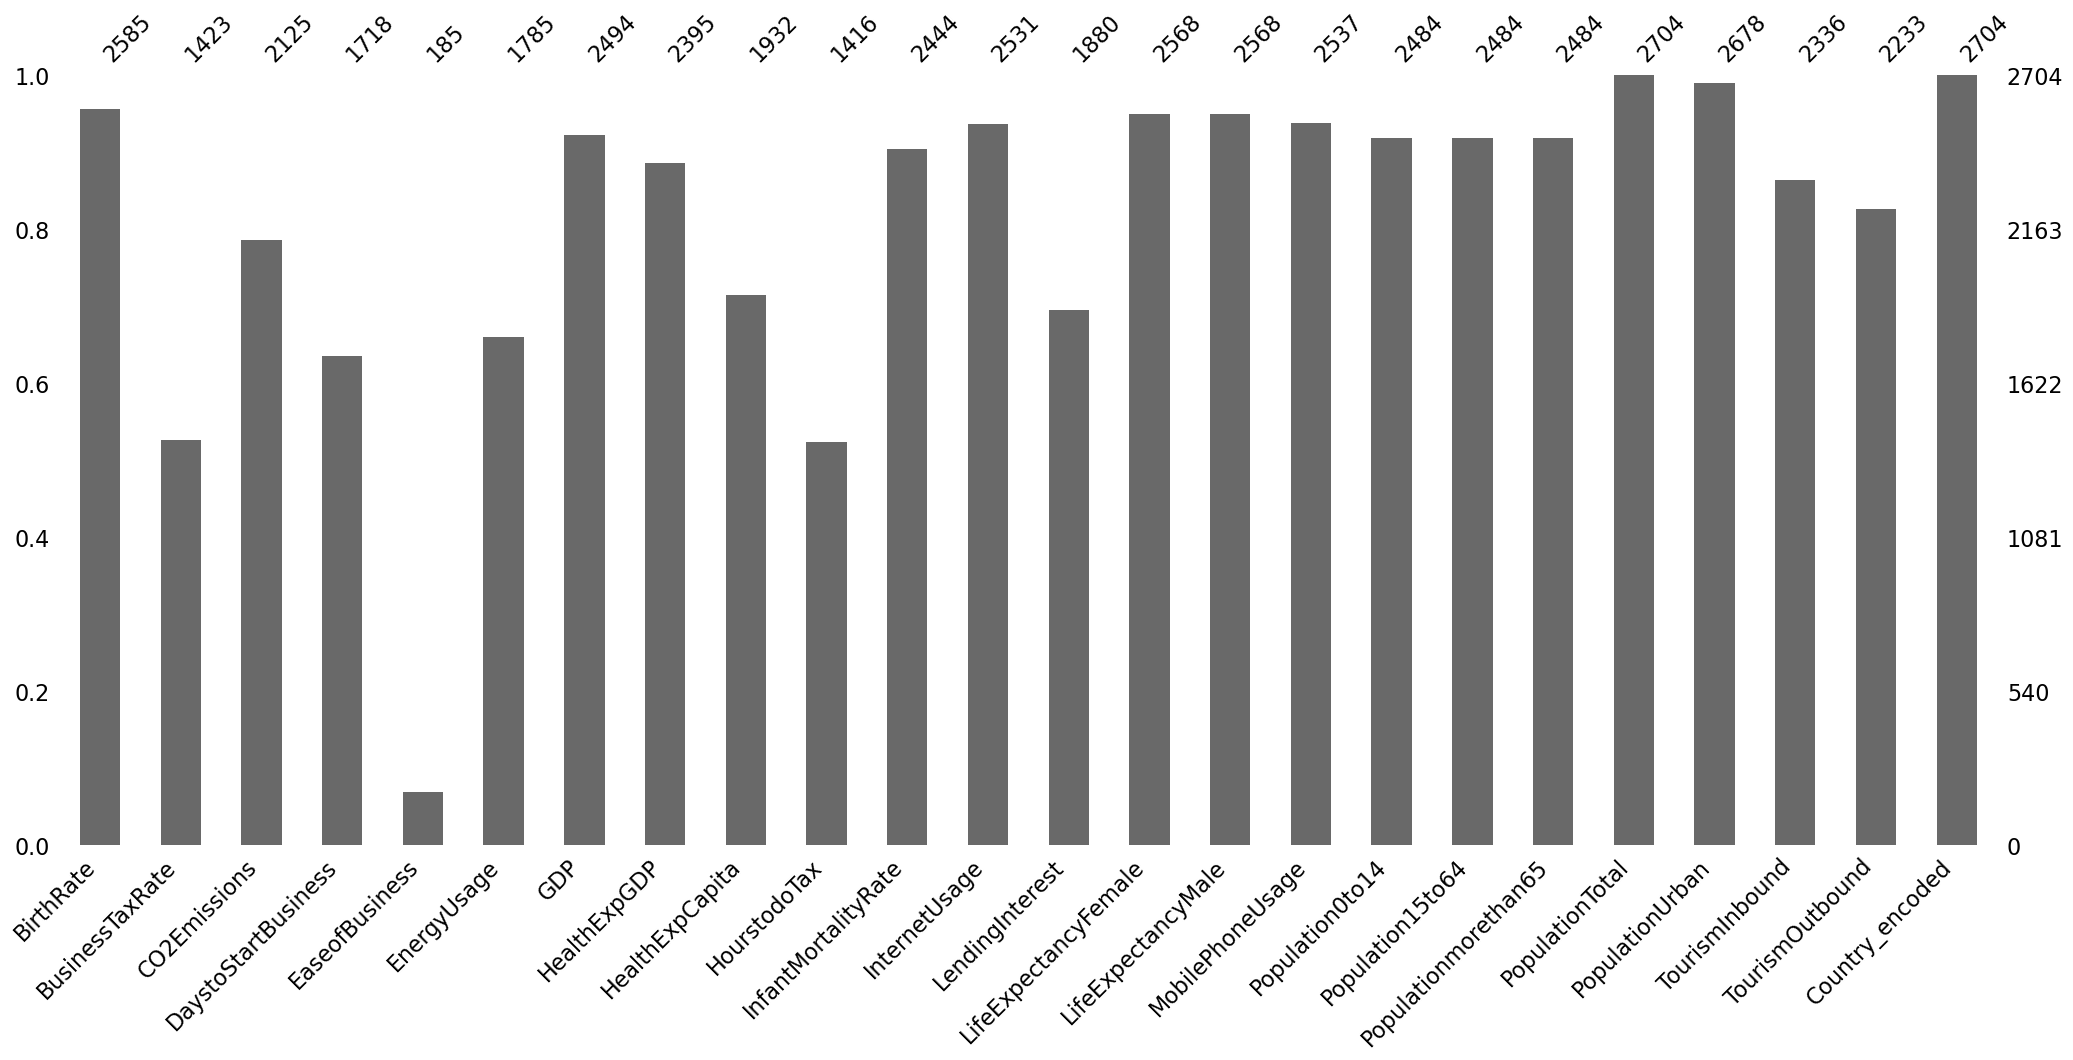

In [32]:
## visualize missing value for each artibute
import missingno as msno
msno.bar(data_world_development)
plt.show()

In [33]:
#There are 26 null values in population urban column which is less than 1% values so droping those rows


In [34]:
## Remove rows having null values
data_world_development.dropna(subset=['PopulationUrban'],inplace=True)

## check null values
data_world_development.isnull().sum()

BirthRate                119
BusinessTaxRate         1259
CO2Emissions             553
DaystoStartBusiness      964
EaseofBusiness          2494
EnergyUsage              905
GDP                      197
HealthExpGDP             283
HealthExpCapita          746
HourstodoTax            1266
InfantMortalityRate      234
InternetUsage            147
LendingInterest          807
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         141
Population0to14          195
Population15to64         195
Populationmorethan65     195
PopulationTotal            0
PopulationUrban            0
TourismInbound           342
TourismOutbound          445
Country_encoded            0
dtype: int64

# The goal is to find out which is a better measure of the central tendency of data and use that value for replacing missing values appropriately.

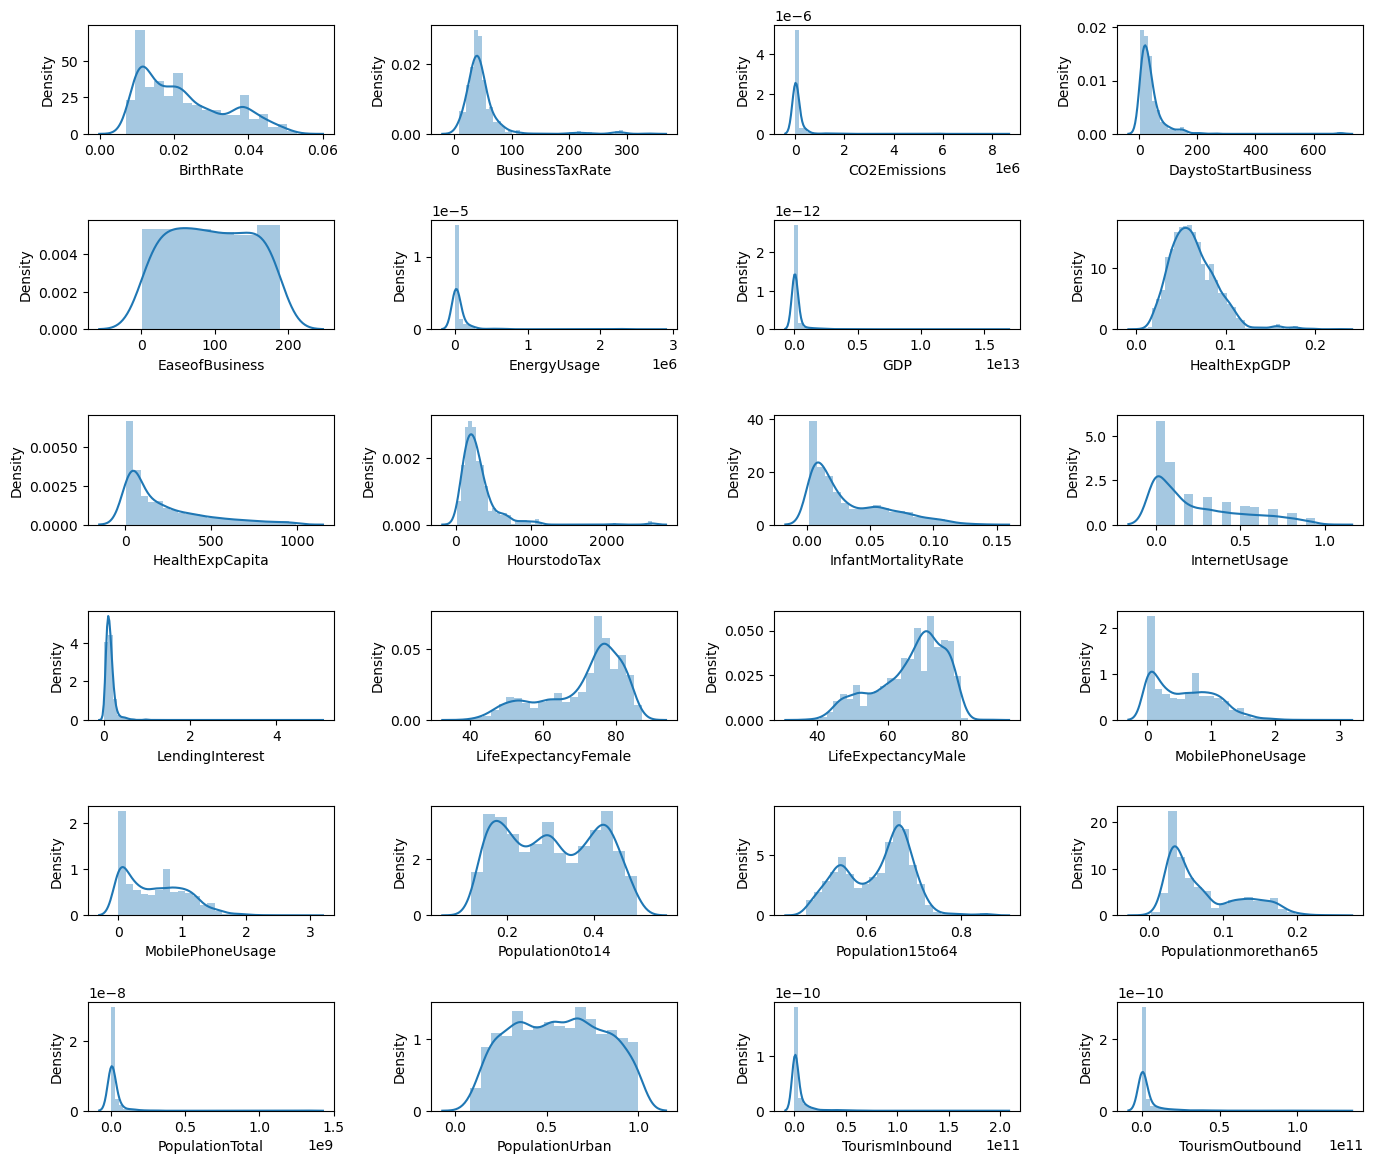

In [35]:
## Distribution plots for all columns
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(data_world_development.BirthRate,ax=axes[0,0])
sns.distplot(data_world_development.BusinessTaxRate,ax=axes[0,1])
sns.distplot(data_world_development.CO2Emissions,ax=axes[0,2])
sns.distplot(data_world_development.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(data_world_development.EaseofBusiness,ax=axes[1,0])
sns.distplot(data_world_development.EnergyUsage,ax=axes[1,1])
sns.distplot(data_world_development.GDP,ax=axes[1,2])
sns.distplot(data_world_development.HealthExpGDP,ax=axes[1,3])
sns.distplot(data_world_development.HealthExpCapita,ax=axes[2,0])
sns.distplot(data_world_development.HourstodoTax,ax=axes[2,1])
sns.distplot(data_world_development.InfantMortalityRate,ax=axes[2,2])
sns.distplot(data_world_development.InternetUsage,ax=axes[2,3])
sns.distplot(data_world_development.LendingInterest,ax=axes[3,0])
sns.distplot(data_world_development.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(data_world_development.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(data_world_development.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(data_world_development.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(data_world_development.Population0to14,ax=axes[4,1])
sns.distplot(data_world_development.Population15to64,ax=axes[4,2])
sns.distplot(data_world_development.Populationmorethan65,ax=axes[4,3])
sns.distplot(data_world_development.PopulationTotal,ax=axes[5,0])
sns.distplot(data_world_development.PopulationUrban,ax=axes[5,1])
sns.distplot(data_world_development.TourismInbound,ax=axes[5,2])
sns.distplot(data_world_development.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

'BusinessTaxRate', 'EaseofBusiness', 'HealthExpGDP', 'HourstodoTax' and 'Population0to14' columns has normal distribution so we replace missing values by mean.

And for remaining columns with skewed data we replace missing values by median.

In [36]:
## Replace missing values by mean

data_world_development['BusinessTaxRate'] = data_world_development['BusinessTaxRate'].fillna(data_world_development['BusinessTaxRate'].mean())
data_world_development['EaseofBusiness'] = data_world_development['EaseofBusiness'].fillna(data_world_development['EaseofBusiness'].mean())
data_world_development['HealthExpGDP'] = data_world_development['HealthExpGDP'].fillna(data_world_development['HealthExpGDP'].mean())
data_world_development['HourstodoTax'] = data_world_development['HourstodoTax'].fillna(data_world_development['HourstodoTax'].mean())
data_world_development['Population0to14'] = data_world_development['Population0to14'].fillna(data_world_development['Population0to14'].mean())


In [37]:
## Replace missing values by median

data_world_development['BirthRate'] = data_world_development['BirthRate'].fillna(data_world_development['BirthRate'].median())
data_world_development['CO2Emissions'] = data_world_development['CO2Emissions'].fillna(data_world_development['CO2Emissions'].median())
data_world_development['DaystoStartBusiness'] = data_world_development['DaystoStartBusiness'].fillna(data_world_development['DaystoStartBusiness'].median())
data_world_development['EnergyUsage'] = data_world_development['EnergyUsage'].fillna(data_world_development['EnergyUsage'].median())
data_world_development['HealthExpCapita']=data_world_development['HealthExpCapita'].fillna(data_world_development['HealthExpCapita'].mean())
data_world_development['GDP'] = data_world_development['GDP'].fillna(data_world_development['GDP'].median())
data_world_development['InfantMortalityRate'] = data_world_development['InfantMortalityRate'].fillna(data_world_development['InfantMortalityRate'].median())
data_world_development['InternetUsage'] = data_world_development['InternetUsage'].fillna(data_world_development['InternetUsage'].median())
data_world_development['LendingInterest'] = data_world_development['LendingInterest'].fillna(data_world_development['LendingInterest'].median())
data_world_development['LifeExpectancyFemale'] = data_world_development['LifeExpectancyFemale'].fillna(data_world_development['LifeExpectancyFemale'].median())
data_world_development['LifeExpectancyMale'] = data_world_development['LifeExpectancyMale'].fillna(data_world_development['LifeExpectancyMale'].median())
data_world_development['MobilePhoneUsage'] = data_world_development['MobilePhoneUsage'].fillna(data_world_development['MobilePhoneUsage'].median())
data_world_development['TourismInbound'] = data_world_development['TourismInbound'].fillna(data_world_development['TourismInbound'].median())
data_world_development['TourismOutbound'] = data_world_development['TourismOutbound'].fillna(data_world_development['TourismOutbound'].median())
data_world_development['Population15to64'] = data_world_development['Population15to64'].fillna(data_world_development['Population15to64'].median())
data_world_development['Populationmorethan65'] = data_world_development['Populationmorethan65'].fillna(data_world_development['Populationmorethan65'].median())

In [38]:
## check missising values
print("{} missing values present in whole data.".format(data_world_development.isnull().sum().sum()))

0 missing values present in whole data.


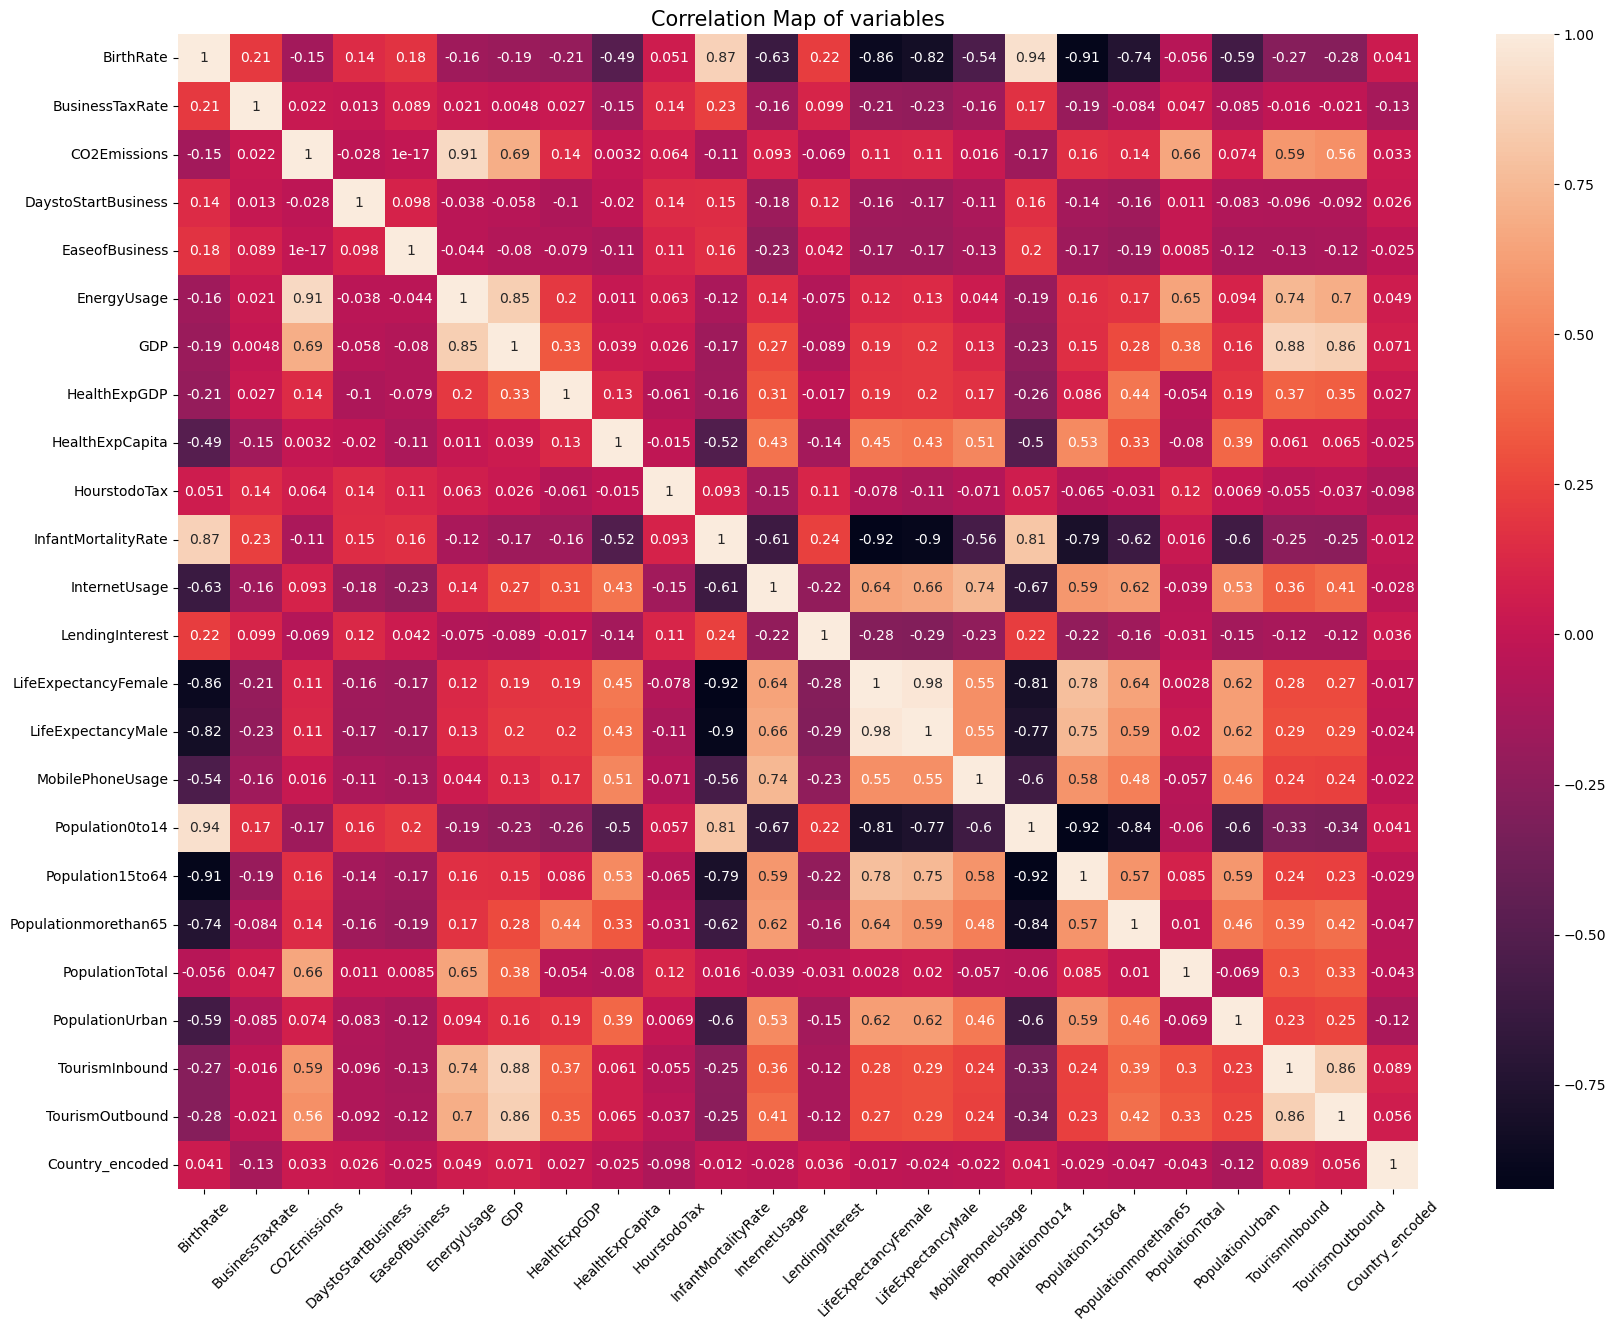

In [39]:
## visualise relation between variables
plt.figure(figsize=(20,15))
sns.heatmap(data_world_development.corr(),annot=True)
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=15)
plt.show()

'Population 0 to 14' and 'Birth Rate' has strong relation.

'Population 15 to 64' and 'Birth Rate' has weak relation.

In [40]:
## making copy of data
data1 = data_world_development.copy()    # For method 1
data2 = data_world_development.copy()    # For method 2
data3 = data_world_development.copy()    # For method 3

# Outlier Detection

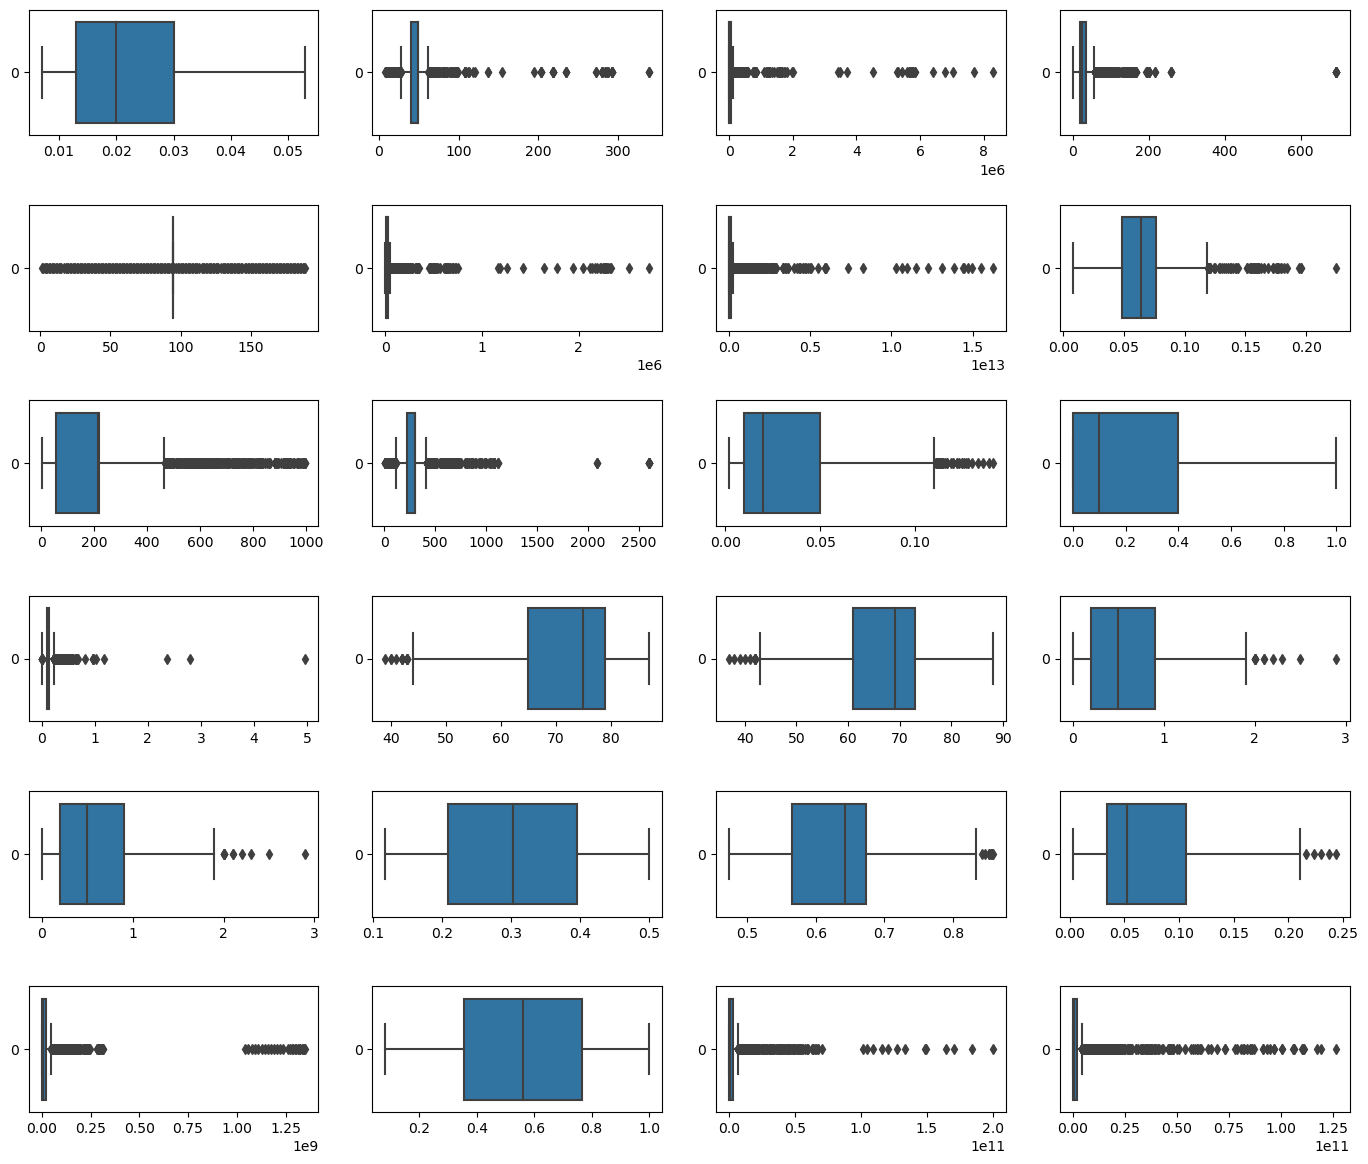

In [41]:
## Check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(data1.BirthRate,orient="h",ax=axes[0,0])
sns.boxplot(data1.BusinessTaxRate,orient="h",ax=axes[0,1])
sns.boxplot(data1.CO2Emissions,orient="h",ax=axes[0,2])
sns.boxplot(data1.DaystoStartBusiness,orient="h",ax=axes[0,3])
sns.boxplot(data1.EaseofBusiness,orient="h",ax=axes[1,0])
sns.boxplot(data1.EnergyUsage,orient="h",ax=axes[1,1])
sns.boxplot(data1.GDP,orient="h",ax=axes[1,2])
sns.boxplot(data1.HealthExpGDP,orient="h",ax=axes[1,3])
sns.boxplot(data1.HealthExpCapita,orient="h",ax=axes[2,0])
sns.boxplot(data1.HourstodoTax,orient="h",ax=axes[2,1])
sns.boxplot(data1.InfantMortalityRate,orient="h",ax=axes[2,2])
sns.boxplot(data1.InternetUsage,orient="h",ax=axes[2,3])
sns.boxplot(data1.LendingInterest,orient="h",ax=axes[3,0])
sns.boxplot(data1.LifeExpectancyFemale,orient="h",ax=axes[3,1])
sns.boxplot(data1.LifeExpectancyMale,orient="h",ax=axes[3,2])
sns.boxplot(data1.MobilePhoneUsage,orient="h",ax=axes[3,3])
sns.boxplot(data1.MobilePhoneUsage,orient="h",ax=axes[4,0])
sns.boxplot(data1.Population0to14,orient="h",ax=axes[4,1])
sns.boxplot(data1.Population15to64,orient="h",ax=axes[4,2])
sns.boxplot(data1.Populationmorethan65,orient="h",ax=axes[4,3])
sns.boxplot(data1.PopulationTotal,orient="h",ax=axes[5,0])
sns.boxplot(data1.PopulationUrban,orient="h",ax=axes[5,1])
sns.boxplot(data1.TourismInbound,orient="h",ax=axes[5,2])
sns.boxplot(data1.TourismOutbound,orient="h",ax=axes[5,3])
plt.tight_layout(pad=2.0)

Some columns like "Population Total", "Tourism in bound", "Tourism out bound" has large number of outlier present.

columns like "Population Urban", "Population 0 to 14" has less number of outliers.

# Method 1

# Remove Outliers

In [42]:
## Outlier removal
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
data1.shape

(1038, 24)

By outlier removal we lost 60% of data.

# Scaling

In [44]:
## Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(data1)

In [45]:
scale_data

array([[-0.35572199,  0.40289149,  4.0121824 , ..., -0.67795368,
        -0.46875507, -1.68939378],
       [ 1.68771081,  0.40289149, -0.55841953, ..., -0.70131689,
        -0.69137564, -1.38459817],
       [ 0.26619234,  0.40289149, -0.41761699, ..., -0.56113764,
        -0.44384647, -1.29993272],
       ...,
       [-0.35572199,  0.40289149, -0.19240706, ...,  0.02481164,
        -0.58240053,  1.05376671],
       [-0.35572199,  0.40289149, -0.19240706, ..., -0.1298528 ,
        -0.05932004,  1.54482631],
       [-1.15532612,  0.40289149, -0.19240706, ..., -0.1298528 ,
        -0.05932004,  1.73109029]])

In [46]:
#Apply PCA

In [47]:
from sklearn.decomposition import PCA
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [48]:
# The amount of variance that each PCA explains is
pc.explained_variance_

array([8.80263184e+00, 2.93166999e+00, 1.88258907e+00, 1.22923438e+00,
       1.11158397e+00, 9.68177915e-01, 8.84572953e-01, 7.54272809e-01,
       6.86606730e-01, 6.19812318e-01, 5.82121321e-01, 4.82942967e-01,
       4.39530900e-01, 3.71017224e-01, 3.14063229e-01, 2.67903587e-01,
       2.35137280e-01, 1.79273215e-01, 1.30046963e-01, 8.47006744e-02,
       5.02070503e-02, 1.40302688e-02, 5.27142528e-05, 1.64150799e-37])

In [49]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.82354411e-01, 1.27341115e-01, 8.17728433e-02, 5.33934847e-02,
       4.82831774e-02, 4.20541383e-02, 3.84226419e-02, 3.27628761e-02,
       2.98237069e-02, 2.69223998e-02, 2.52852396e-02, 2.09772915e-02,
       1.90916287e-02, 1.61156430e-02, 1.36417680e-02, 1.16367605e-02,
       1.02135109e-02, 7.78697848e-03, 5.64876854e-03, 3.67909020e-03,
       2.18081223e-03, 6.09424007e-04, 2.28971602e-06, 7.13011553e-39])

In [50]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 38.24,  50.97,  59.15,  64.49,  69.32,  73.53,  77.37,  80.65,
        83.63,  86.32,  88.85,  90.95,  92.86,  94.47,  95.83,  96.99,
        98.01,  98.79,  99.35,  99.72,  99.94, 100.  , 100.  , 100.  ])

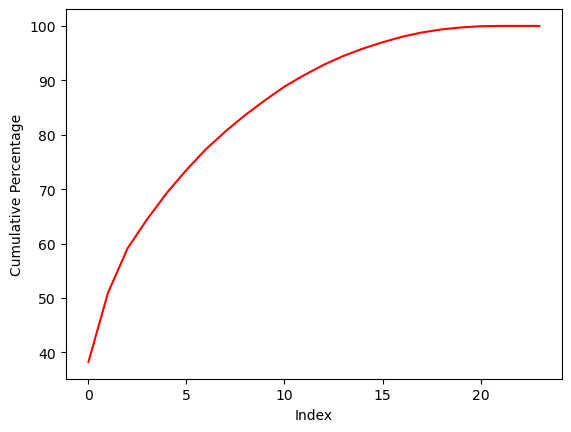

In [51]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers. here, we are taking 15 columns because they are giving more than 95% data.

In [52]:
data_pca = pc_components[:,:15]


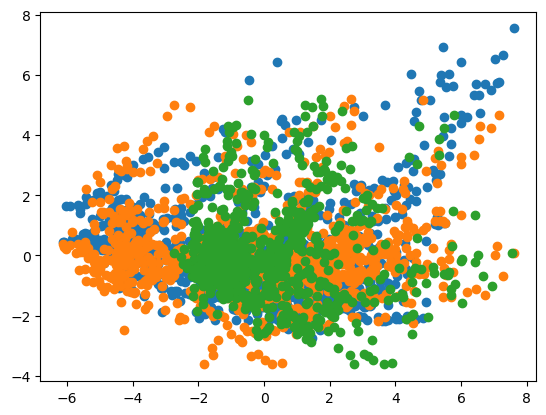

In [53]:
## Plot between PCA's
x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()

# Model Building

K-means Clustring

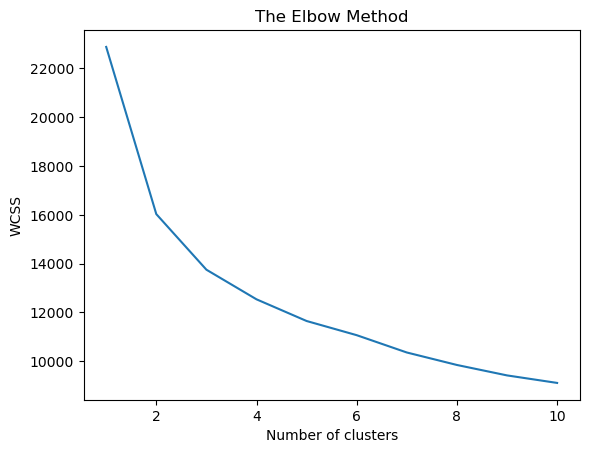

In [54]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see,

3 is the elbow point.
We have to create three clusters

In [55]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)

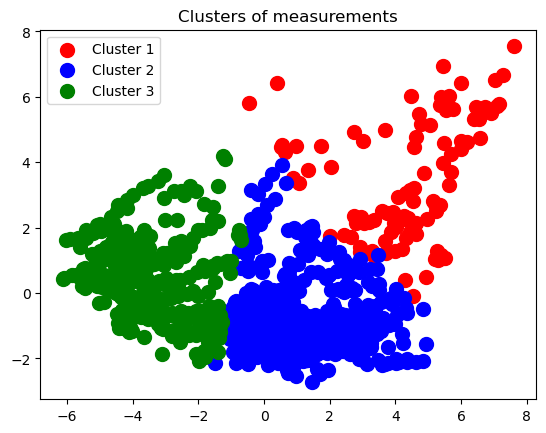

In [56]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

We get the three clusters of measurments.


In [57]:
## Accuracy check
from sklearn.metrics import silhouette_score
s1_kmeans = silhouette_score(data_pca, y_kmeans)
print('Silhouette Score for K-means clustring :', s1_kmeans)

Silhouette Score for K-means clustring : 0.28128112023335633


Hierarchy Clustring


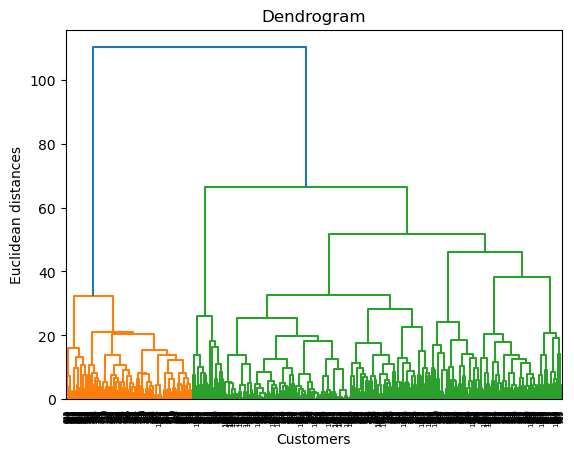

In [58]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)

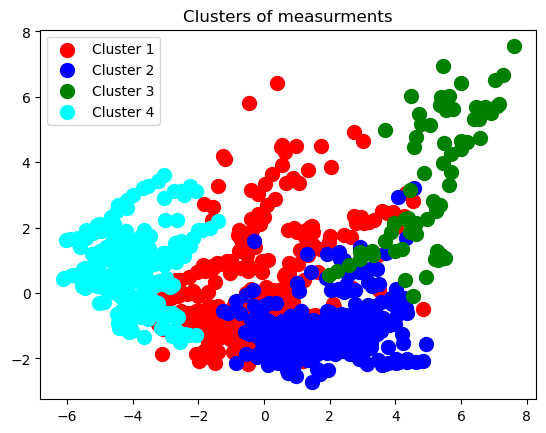

In [60]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [61]:
## Accuracy check
s1_hierarchy = silhouette_score(data_pca,y_hc)
print('Silhouette Score for Hierarchy clustring :',s1_hierarchy)

Silhouette Score for Hierarchy clustring : 0.20812026657624785


DBSCAN

In [62]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

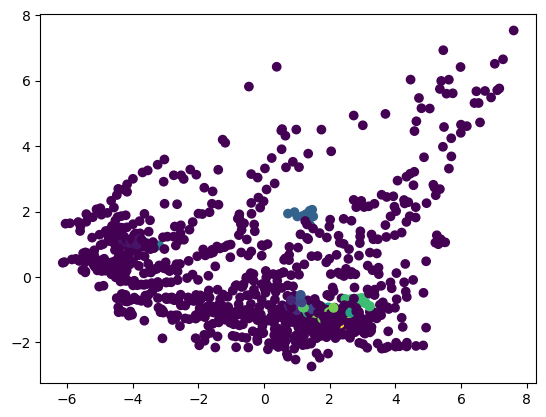

In [63]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels)
plt.show()

In [64]:
data1['cluster']=dbscan.labels_
data1.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.035,60.0,302.461048,...,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.043,15.0,302.461048,...,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.047,152.0,302.461048,...,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.051,12.0,302.461048,...,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,29.0,-1
5,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.063,7.0,302.461048,...,0.0,0.490,0.481,0.029,6674286.0,0.082,1400000.0,14000000.0,30.0,-1


In [65]:
# Use pandas filtering and get noisy datapoints -1
data1[data1['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.000000,302.461048,...,0.0,0.342000,0.619,0.039,31719449.0,0.599,1.020000e+08,193000000.0,2.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.000000,302.461048,...,0.0,0.454000,0.517,0.029,6949366.0,0.383,7.700000e+07,50000000.0,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.000000,302.461048,...,0.1,0.383000,0.587,0.029,1755375.0,0.532,2.270000e+08,209000000.0,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.000000,302.461048,...,0.0,0.468000,0.505,0.028,11607944.0,0.178,2.300000e+07,30000000.0,29.0,-1
5,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.06300,7.000000,302.461048,...,0.0,0.490000,0.481,0.029,6674286.0,0.082,1.400000e+06,14000000.0,30.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,0.016,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,214.627847,302.461048,...,0.9,0.228000,0.673,0.099,258000.0,0.685,6.885000e+08,456000000.0,135.0,-1
2661,0.010,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,214.627847,302.461048,...,1.3,0.199000,0.690,0.110,102384.0,0.424,1.414000e+09,296000000.0,9.0,-1
2665,0.012,49.051656,8529.0,26.0,94.869565,14673.0,5.473536e+09,0.06417,214.627847,302.461048,...,1.4,0.303062,0.642,0.052,64798.0,1.000,4.610000e+08,411000000.0,21.0,-1
2669,0.013,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,214.627847,302.461048,...,1.7,0.303062,0.642,0.052,57570.0,1.000,6.885000e+08,456000000.0,34.0,-1


In [66]:
s1_dbscan = silhouette_score(data_pca, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s1_dbscan)

Silhouette Score for DBSCAN is: -0.24380431741484504


In [67]:
#DBSCAN is not most effective on this dataset

We get clustrers but, we used outlier removal data. Problem with that data is we have only 40% data left after removing outliers. Which means we loss more than 50% information from out dataset. So, we have to keep outliers. Now, create clusters with this data.

# Method 2

In [68]:
## Standardization of data
scaler = StandardScaler()
scale_data = scaler.fit_transform(data2)

Apply PCA

In [69]:
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [70]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.52595664e-01, 1.66668623e-01, 6.12948589e-02, 5.33069518e-02,
       4.59935300e-02, 3.98740358e-02, 3.80856924e-02, 3.31573767e-02,
       3.28690286e-02, 3.23744527e-02, 2.94653611e-02, 2.47605986e-02,
       2.11842644e-02, 1.84471846e-02, 1.25144343e-02, 1.08721054e-02,
       8.89476326e-03, 5.34362958e-03, 4.34563896e-03, 3.55670903e-03,
       2.12578633e-03, 1.60464989e-03, 6.63127567e-04, 1.53314868e-06])

In [71]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 35.26,  51.93,  58.06,  63.39,  67.99,  71.98,  75.79,  79.11,
        82.4 ,  85.64,  88.59,  91.07,  93.19,  95.03,  96.28,  97.37,
        98.26,  98.79,  99.22,  99.58,  99.79,  99.95, 100.02, 100.02])

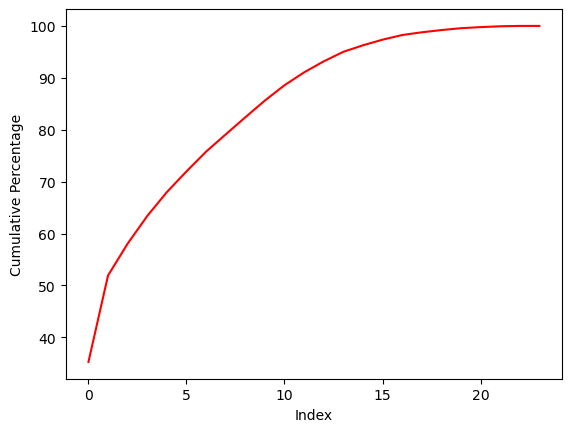

In [72]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers. here, we are taking 15 columns because they are giving more than 95% data.

In [73]:
data_pca2 = pc_components[:,:15]


K-means Clustring

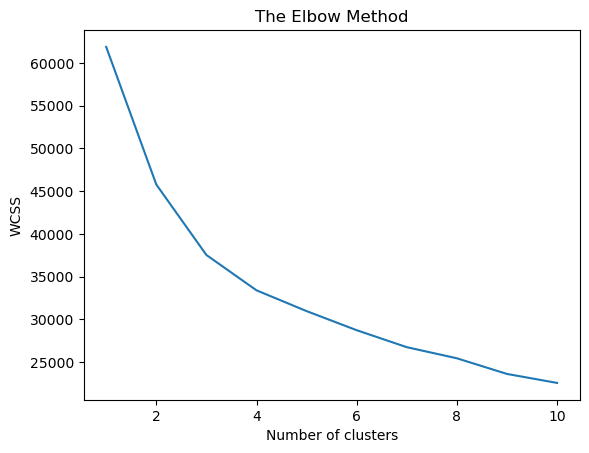

In [74]:
#Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see,

3 is the elbow point.
We have to create three clusters

In [75]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca2)

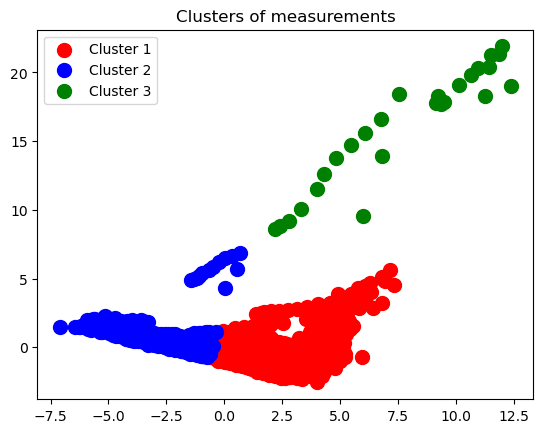

In [76]:
plt.scatter(data_pca2[y_kmeans == 0, 0], data_pca2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_kmeans == 1, 0], data_pca2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_kmeans == 2, 0], data_pca2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [77]:
## Accuracy Check
s2_kmeans = silhouette_score(data_pca2, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)

Silhouette Score for K-means clustring : 0.30609870945384604


Hierarchy Clustring


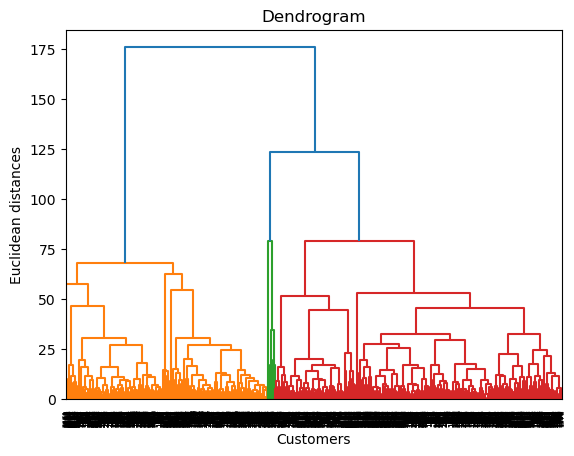

In [78]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [79]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca2)

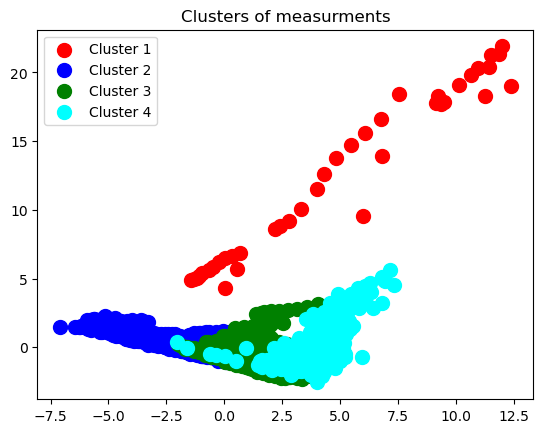

In [80]:
plt.scatter(data_pca2[y_hc == 0, 0], data_pca2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_hc == 1, 0], data_pca2[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_hc == 2, 0], data_pca2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca2[y_hc == 3, 0], data_pca2[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [81]:
## Accuracy check
s2_hierarchy = silhouette_score(data_pca2,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.1962303694757605


DBSCAN

In [82]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca2)

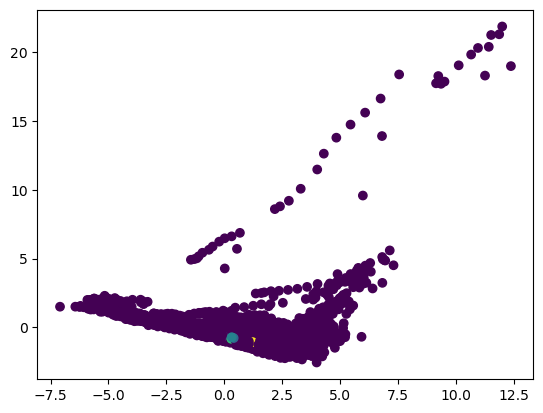

In [83]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan_labels)
plt.show()

In [84]:
data2['cluster']=dbscan.labels_

In [85]:
data2[data2['cluster']==-1]


,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.000000,302.461048,...,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0,-1
1,0.050,49.051656,9542.0,26.0,94.869565,7499.0,9.129595e+09,0.03400,22.000000,302.461048,...,0.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,5.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.000000,302.461048,...,0.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.000000,302.461048,...,0.1,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.000000,302.461048,...,0.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,29.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0.015,29.100000,8529.0,41.0,63.000000,14673.0,2.343634e+10,0.05400,972.000000,210.000000,...,1.4,0.207,0.705,0.088,1337439.0,0.088,6.885000e+08,4.560000e+08,189.0,-1
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,214.627847,175.000000,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,198.0,-1
2701,0.015,41.900000,8529.0,7.0,85.000000,14673.0,5.000435e+10,0.08900,214.627847,310.000000,...,1.5,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,199.0,-1
2702,0.020,61.900000,8529.0,144.0,180.000000,14673.0,3.812862e+11,0.04600,593.000000,792.000000,...,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,202.0,-1


In [86]:
s2_dbscan = silhouette_score(data_pca2, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s2_dbscan)

Silhouette Score for DBSCAN is: -0.43479325563802645


# Method 3

T-SNE

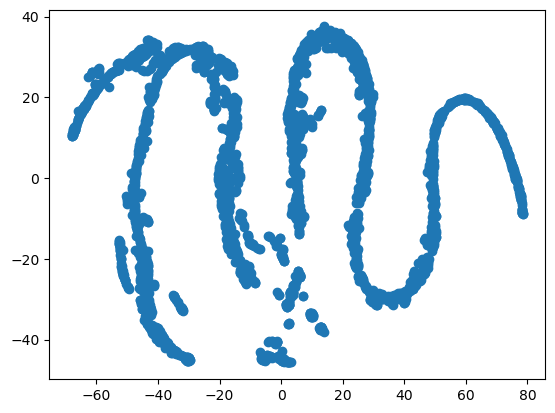

In [87]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters
tsne = TSNE()

# Fit and transform the data to 2 dimensions
data_tsne = tsne.fit_transform(data3)

# Plot the results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.show()

K-means Clustring


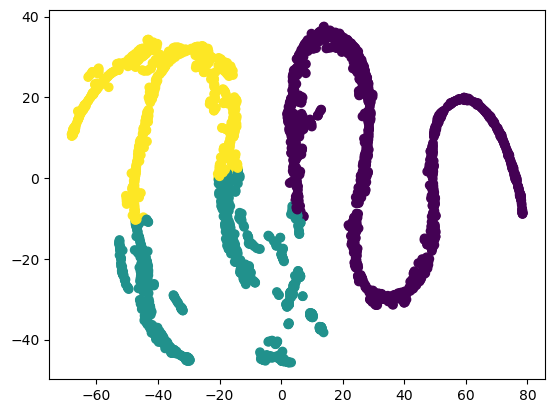

In [88]:
# Perform clustering with KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_tsne)

# Plot the clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1],c=y_kmeans)
plt.show()

In [89]:
## Accuracy check
s3_kmeans = silhouette_score(data_tsne, y_kmeans)
print('Silhouette Score for K-means clustring :', s3_kmeans)

Silhouette Score for K-means clustring : 0.41426405


# Hierarchy Clustring

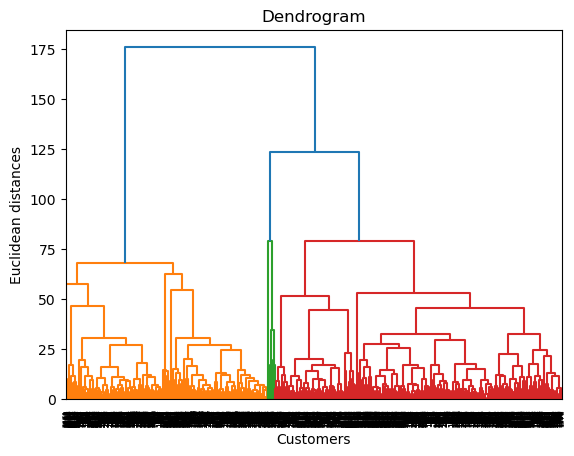

In [90]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [91]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne)

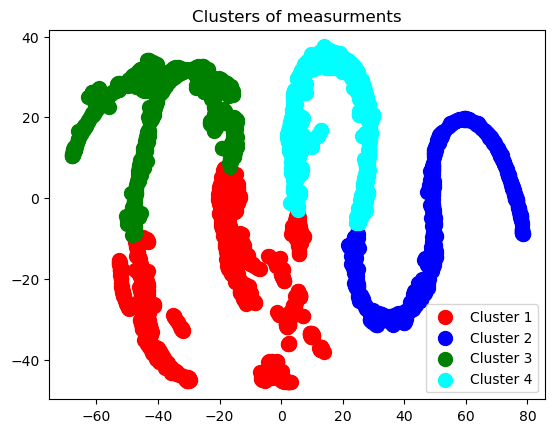

In [92]:
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_hc == 3, 0], data_tsne[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [93]:
## Accuracy check
s3_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s3_hierarchy)

Silhouette Score for Hierarchy clustring : 0.4132112


In [94]:
df = pd.DataFrame({'Method':['M1 kmeans','M1 hierarchy','M1 DBSCAN','M2 kmeans','M2 hierarchy','M2 DBSCAN','M3 kmeans','M3 hierarchy'],
                   'Silhouette Score':[s1_kmeans,s1_hierarchy,s1_dbscan,s2_kmeans,s2_hierarchy,s2_dbscan,s3_kmeans,s3_hierarchy]})
df

,Method,Silhouette Score
0,M1 kmeans,0.281281
1,M1 hierarchy,0.208120
2,M1 DBSCAN,-0.243804
3,M2 kmeans,0.306099
4,M2 hierarchy,0.196230
5,M2 DBSCAN,-0.434793
6,M3 kmeans,0.414264
7,M3 hierarchy,0.413211


# Conclusion

By comparing 'Silhouette Score' for each model we get most higest silhoutte score is 0.415 for method 3 Which means applying t-sne for dimensionality reduction and then using K-means clustring for create clusters.This algorithm give us the best clusters compare to other clustring algorithms.

If data is in same clusters it means they have nearly same development measurement,If data is in different clusters it means belongs to different measurement,From this we can say which data has nearly same global development measurement or which is different from each others.

Text(0, 0.5, 'WCSS')

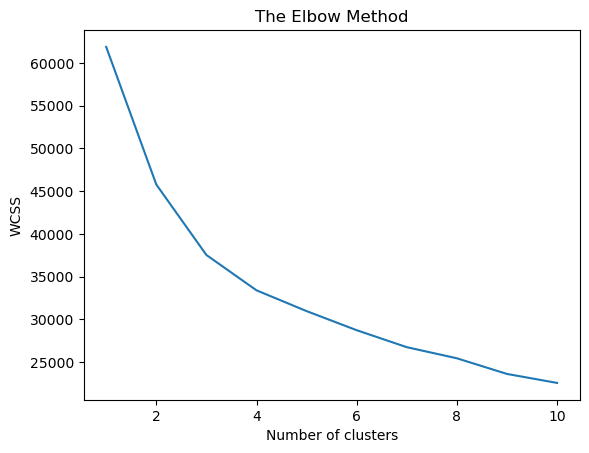

In [95]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data_pca2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [96]:
# Creating clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_pca2)

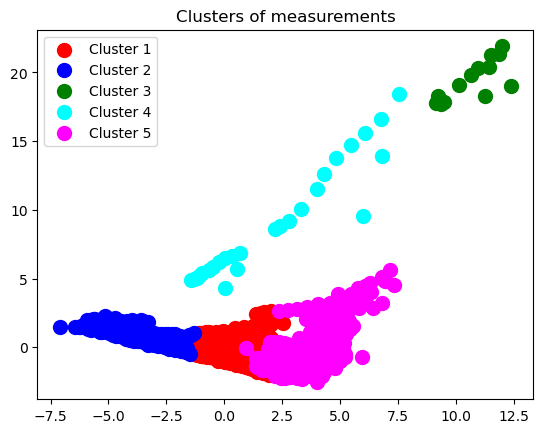

In [97]:
# Plotting the clusters
plt.scatter(data_pca2[y_kmeans == 0, 0], data_pca2[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca2[y_kmeans == 1, 0], data_pca2[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca2[y_kmeans == 2, 0], data_pca2[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_pca2[y_kmeans == 3, 0], data_pca2[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_pca2[y_kmeans == 4, 0], data_pca2[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of measurements')
plt.legend()

In [98]:
# Accuracy check
s2_kmeans2 = silhouette_score(data_pca2, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)

Silhouette Score for K-means clustring : 0.30609870945384604


In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Perform hierarchical clustering
dendrogram = dendrogram(linkage(data_pca2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [ ]:
# Perform agglomerative clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_pca2)

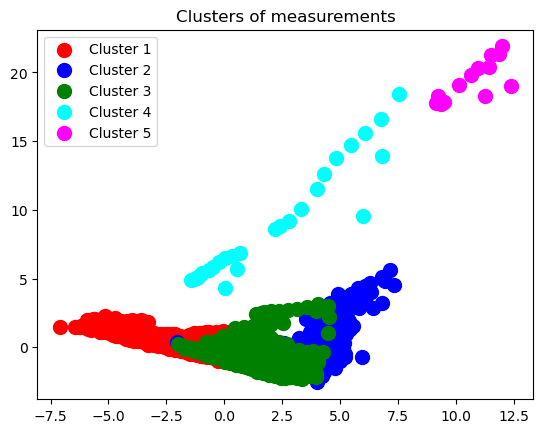

In [102]:
# Plotting the hierarchical clusters
plt.scatter(data_pca2[y_hc == 0, 0], data_pca2[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca2[y_hc == 1, 0], data_pca2[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca2[y_hc == 2, 0], data_pca2[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_pca2[y_hc == 3, 0], data_pca2[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_pca2[y_hc == 4, 0], data_pca2[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of measurements')
plt.legend()

In [103]:
# Accuracy check
s2_hierarchy2 = silhouette_score(data_pca2, y_hc)
print('Silhouette Score for Hierarchy clustring :', s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.1962303694757605


In [104]:
# Perform t-SNE dimensionality reduction
tsne = TSNE()
data_tsne = tsne.fit_transform(data_pca2)

In [105]:
# Perform K-means clustering on the t-SNE transformed data
kmeans_tsne = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_tsne = kmeans_tsne.fit_predict(data_tsne)

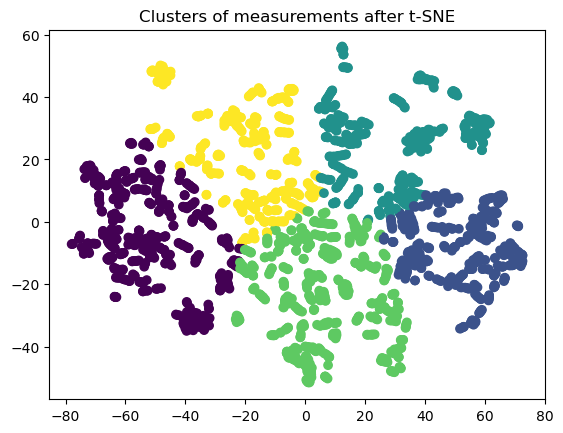

In [106]:
# Plot the t-SNE transformed data with the clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_kmeans_tsne)
plt.title('Clusters of measurements after t-SNE')
plt.show()

In [107]:
# Evaluate the performance of the K-means clustering on the t-SNE transformed data
s3_kmeans2 = silhouette_score(data_tsne, y_kmeans_tsne)
print('Silhouette Score for K-means clustring on t-SNE data :', s3_kmeans)

Silhouette Score for K-means clustring on t-SNE data : 0.41426405


In [108]:
# Perform hierarchical clustering on the t-SNE transformed data
hc_tsne = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc_tsne = hc_tsne.fit_predict(data_tsne)

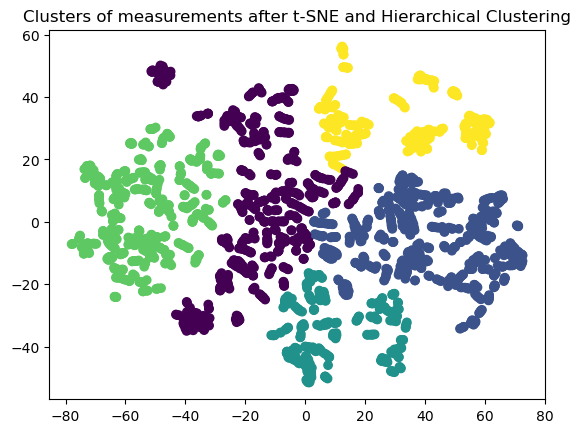

In [109]:
# Plot the t-SNE transformed data with the hierarchical clustering results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_hc_tsne)
plt.title('Clusters of measurements after t-SNE and Hierarchical Clustering')
plt.show()

In [110]:
# Evaluate the performance of the hierarchical clustering on the t-SNE transformed data
s3_hierarchy2 = silhouette_score(data_tsne, y_hc_tsne)
print('Silhouette Score for Hierarchical clustring on t-SNE data :', s3_hierarchy)

Silhouette Score for Hierarchical clustring on t-SNE data : 0.4132112


In [111]:
df2 = pd.DataFrame({'Method':['M2 kmeans','M2 hierarchy','M3 kmeans','M3 hierarchy'],
                   'Silhouette Score':[s2_kmeans2, s2_hierarchy2, s3_kmeans2, s3_hierarchy2]})
df2

,Method,Silhouette Score
0,M2 kmeans,0.217884
1,M2 hierarchy,0.201377
2,M3 kmeans,0.379546
3,M3 hierarchy,0.333969


In [112]:
df = pd.DataFrame({'Method':['M1 kmeans','M1 hierarchy','M1 DBSCAN','M2 kmeans','M2 hierarchy','M2 DBSCAN','M3 kmeans','M3 hierarchy','M2 kmeans2','M2 hierarchy2','M3 kmeans2','M3 hierarchy2'],
                   'Silhouette Score':[s1_kmeans,s1_hierarchy,s1_dbscan,s2_kmeans,s2_hierarchy,s2_dbscan,s3_kmeans,s3_hierarchy,s2_kmeans2, s2_hierarchy2, s3_kmeans2, s3_hierarchy2]})
df

,Method,Silhouette Score
0,M1 kmeans,0.281281
1,M1 hierarchy,0.208120
2,M1 DBSCAN,-0.243804
3,M2 kmeans,0.306099
4,M2 hierarchy,0.196230
5,M2 DBSCAN,-0.434793
6,M3 kmeans,0.414264
7,M3 hierarchy,0.413211
8,M2 kmeans2,0.217884
9,M2 hierarchy2,0.201377


In [113]:
# 6 Clusters

In [120]:
# Creating clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_pca2)

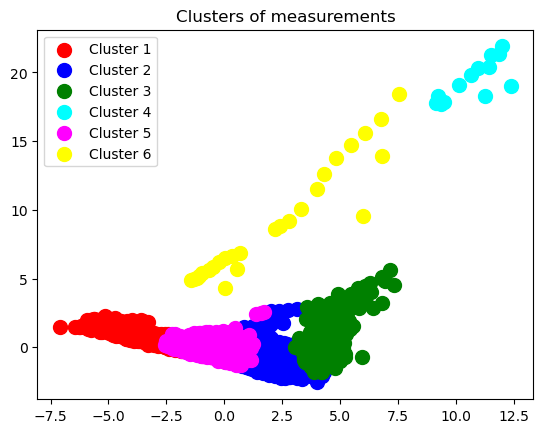

In [123]:
# Plotting the clusters
plt.scatter(data_pca2[y_kmeans == 0, 0], data_pca2[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca2[y_kmeans == 1, 0], data_pca2[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca2[y_kmeans == 2, 0], data_pca2[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_pca2[y_kmeans == 3, 0], data_pca2[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_pca2[y_kmeans == 4, 0], data_pca2[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(data_pca2[y_kmeans == 5, 0], data_pca2[y_kmeans == 5, 1], s=100, c='yellow', label='Cluster 6')
plt.title('Clusters of measurements')
plt.legend()

In [124]:
# Accuracy check
s2_kmeans3 = silhouette_score(data_pca2, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)

Silhouette Score for K-means clustring : 0.30609870945384604


In [125]:
# Perform hierarchical clustering
dendrogram = dendrogram(linkage(data_pca2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

TypeError: 'dict' object is not callable

In [ ]:
# Perform agglomerative clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_pca2)

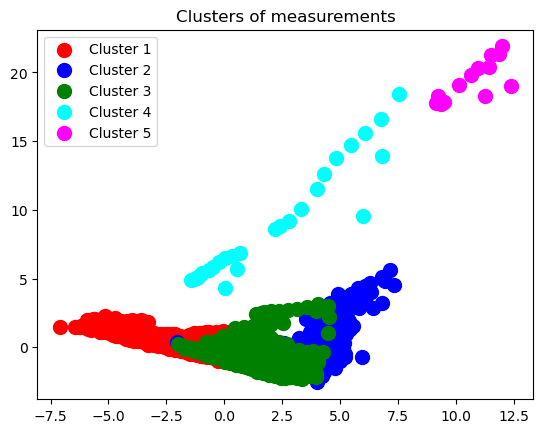

In [115]:
# Plotting the hierarchical clusters
plt.scatter(data_pca2[y_hc == 0, 0], data_pca2[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca2[y_hc == 1, 0], data_pca2[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca2[y_hc == 2, 0], data_pca2[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_pca2[y_hc == 3, 0], data_pca2[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_pca2[y_hc == 4, 0], data_pca2[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of measurements')
plt.legend()

In [126]:
# Accuracy check
s2_hierarchy3 = silhouette_score(data_pca2, y_hc)
print('Silhouette Score for Hierarchy clustring :', s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.1962303694757605


In [127]:
# Perform t-SNE dimensionality reduction
tsne = TSNE()
data_tsne = tsne.fit_transform(data_pca2)